In [131]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score,KFold

In [132]:
zoo=pd.read_csv("/content/sample_data/Zoo.csv")
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [133]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [134]:
zoo.describe().T

,count,mean,std,min,25%,50%,75%,max
hair,101.0,0.425743,0.496921,0.0,0.0,0.0,1.0,1.0
feathers,101.0,0.198020,0.400495,0.0,0.0,0.0,0.0,1.0
eggs,101.0,0.584158,0.495325,0.0,0.0,1.0,1.0,1.0
milk,101.0,0.405941,0.493522,0.0,0.0,0.0,1.0,1.0
airborne,101.0,0.237624,0.427750,0.0,0.0,0.0,0.0,1.0
aquatic,101.0,0.356436,0.481335,0.0,0.0,0.0,1.0,1.0
predator,101.0,0.554455,0.499505,0.0,0.0,1.0,1.0,1.0
toothed,101.0,0.603960,0.491512,0.0,0.0,1.0,1.0,1.0
backbone,101.0,0.821782,0.384605,0.0,1.0,1.0,1.0,1.0
breathes,101.0,0.792079,0.407844,0.0,1.0,1.0,1.0,1.0


In [135]:
zoo=zoo.rename(columns={'animal name':'animal_name'})

In [136]:
zoo[zoo.duplicated()]

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type


In [137]:
zoo.shape

(101, 18)

*********features: animal_name**********


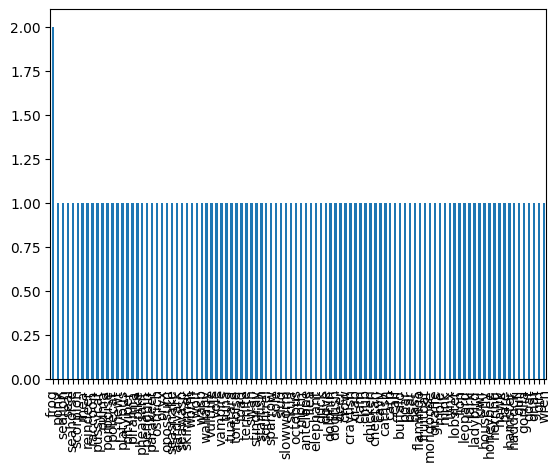

frog        2
pony        1
sealion     1
seal        1
seahorse    1
           ..
gorilla     1
goat        1
gnat        1
girl        1
wren        1
Name: animal_name, Length: 100, dtype: int64
*********features: hair**********


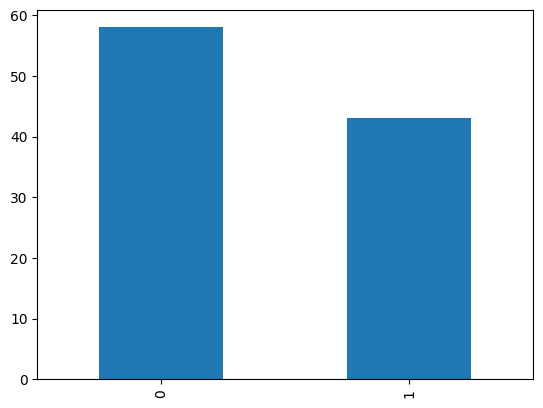

0    58
1    43
Name: hair, dtype: int64
*********features: feathers**********


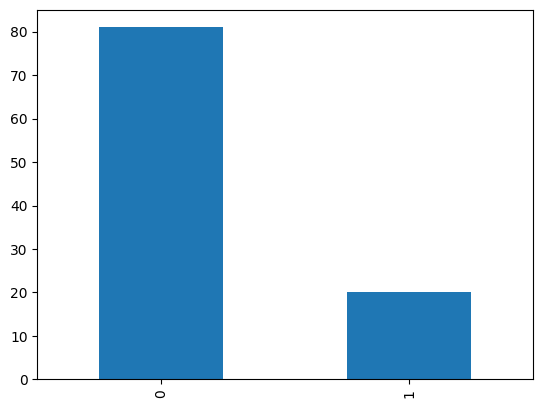

0    81
1    20
Name: feathers, dtype: int64
*********features: eggs**********


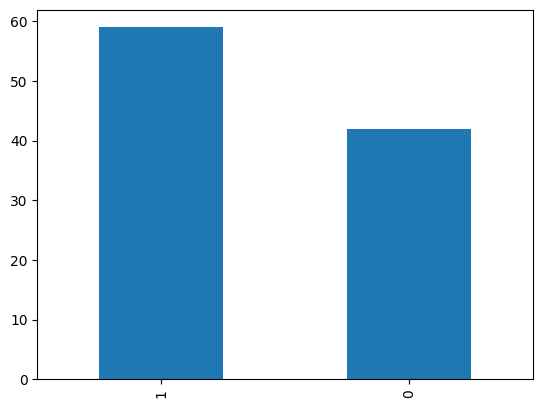

1    59
0    42
Name: eggs, dtype: int64
*********features: milk**********


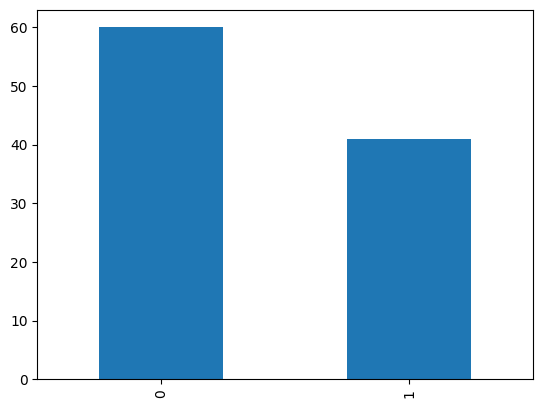

0    60
1    41
Name: milk, dtype: int64
*********features: airborne**********


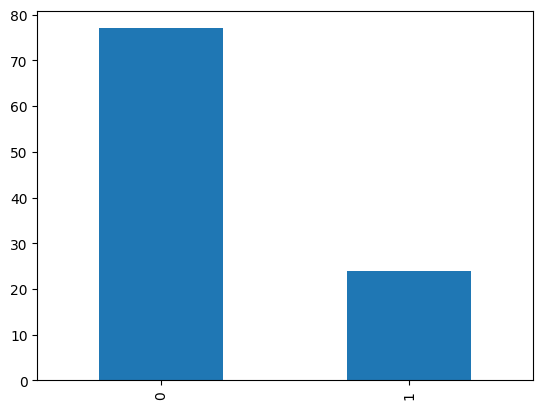

0    77
1    24
Name: airborne, dtype: int64
*********features: aquatic**********


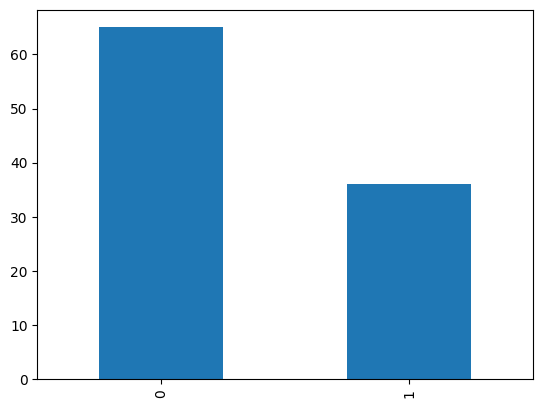

0    65
1    36
Name: aquatic, dtype: int64
*********features: predator**********


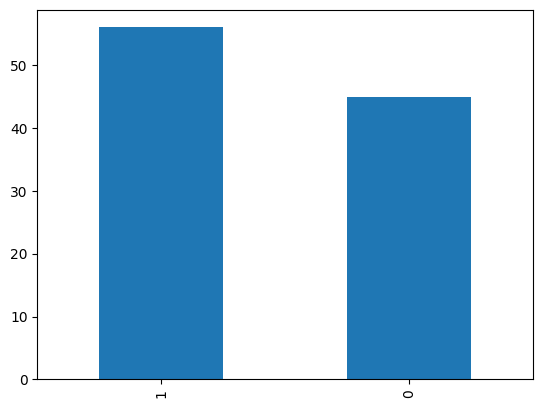

1    56
0    45
Name: predator, dtype: int64
*********features: toothed**********


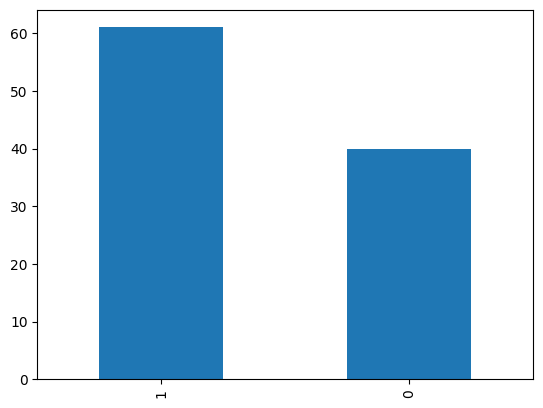

1    61
0    40
Name: toothed, dtype: int64
*********features: backbone**********


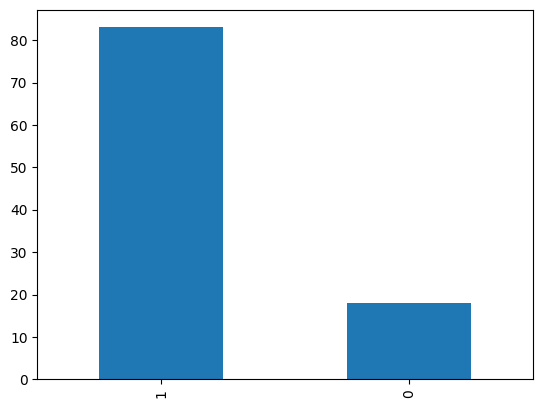

1    83
0    18
Name: backbone, dtype: int64
*********features: breathes**********


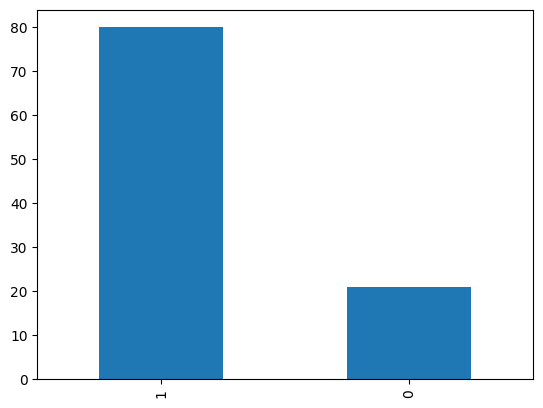

1    80
0    21
Name: breathes, dtype: int64
*********features: venomous**********


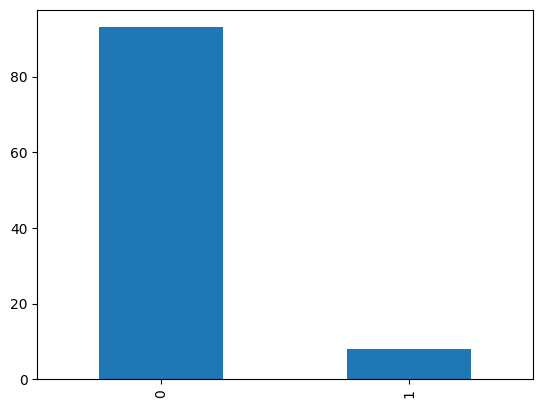

0    93
1     8
Name: venomous, dtype: int64
*********features: fins**********


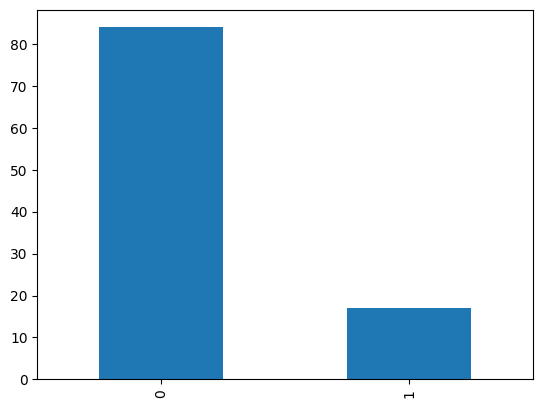

0    84
1    17
Name: fins, dtype: int64
*********features: legs**********


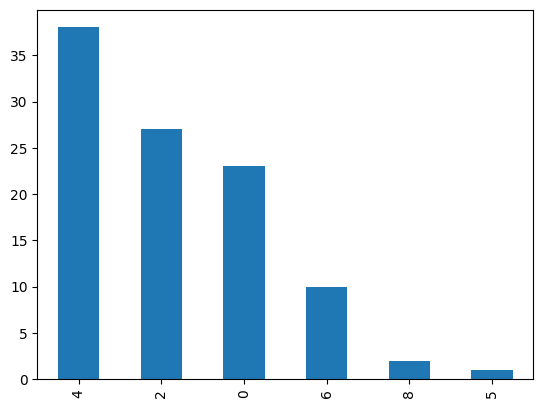

4    38
2    27
0    23
6    10
8     2
5     1
Name: legs, dtype: int64
*********features: tail**********


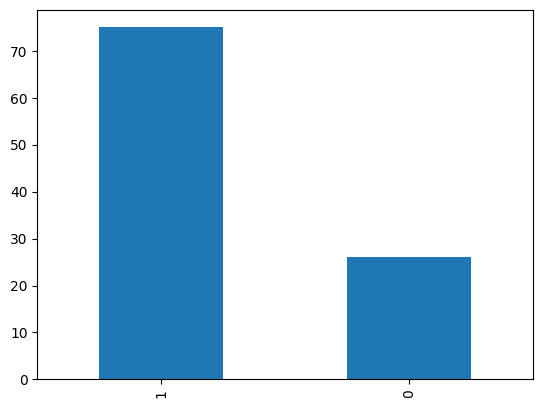

1    75
0    26
Name: tail, dtype: int64
*********features: domestic**********


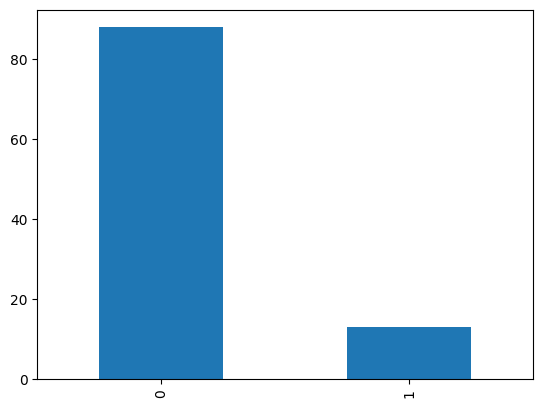

0    88
1    13
Name: domestic, dtype: int64
*********features: catsize**********


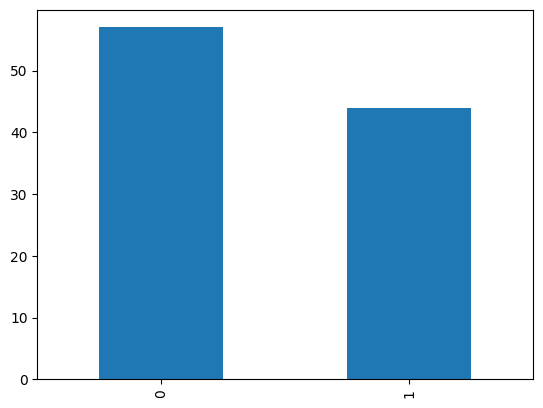

0    57
1    44
Name: catsize, dtype: int64
*********features: type**********


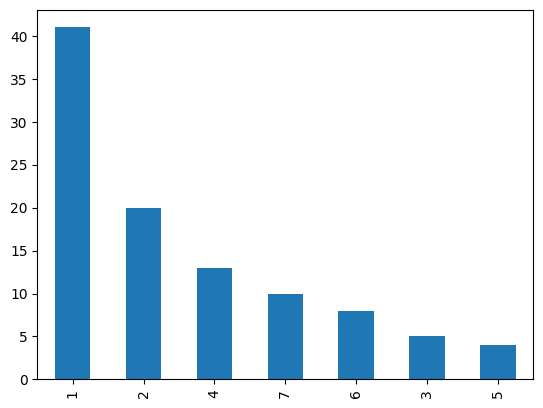

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: type, dtype: int64


In [138]:
for features in zoo.columns:
  if features!='animal name':
    print("*********features: {}**********".format(features))
    zoo[features].value_counts().plot(kind='bar')
    plt.show()
    print(zoo[features].value_counts())

In [139]:
dup=zoo['animal_name'].value_counts()
dup[dup>1]

frog    2
Name: animal_name, dtype: int64

In [140]:
zoo[zoo['animal_name']=='frog']
#here there are two different kind of frog lets devide those in to two category

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


In [141]:
zoo['animal_name'][(zoo['venomous']==1) & (zoo['animal_name']=='frog')]='frog2'

<ipython-input-141-b6a6992682fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zoo['animal_name'][(zoo['venomous']==1) & (zoo['animal_name']=='frog')]='frog2'


In [142]:
zoo[zoo['animal_name']=='frog']

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5


In [143]:
zoo[zoo['animal_name']=='frog2']

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
26,frog2,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


[]

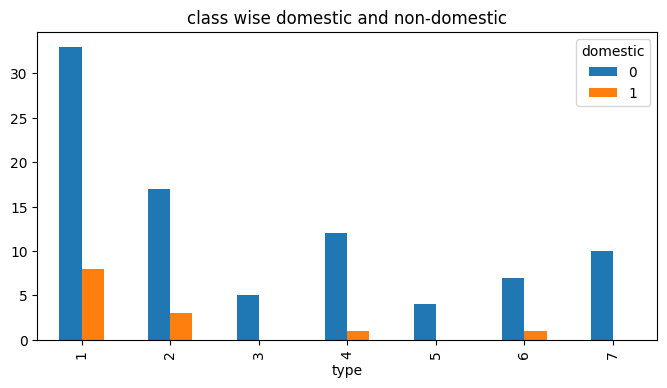

In [144]:
pd.crosstab(zoo['type'],zoo['domestic']).plot(kind='bar',figsize=(8,4),title='class wise domestic and non-domestic')
plt.plot()

[]

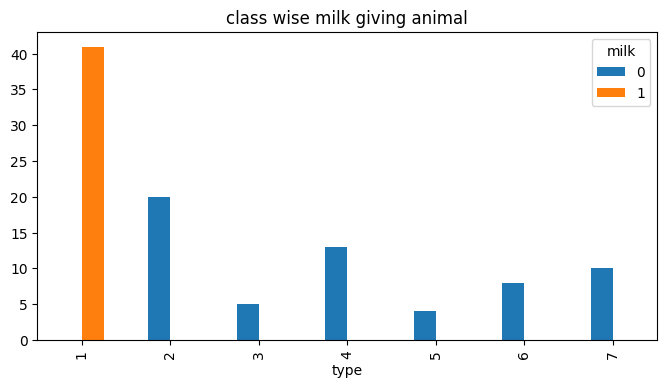

In [145]:
pd.crosstab(zoo['type'],zoo['milk']).plot(kind='bar',figsize=(8,4),title='class wise milk giving animal')
plt.plot()

[]

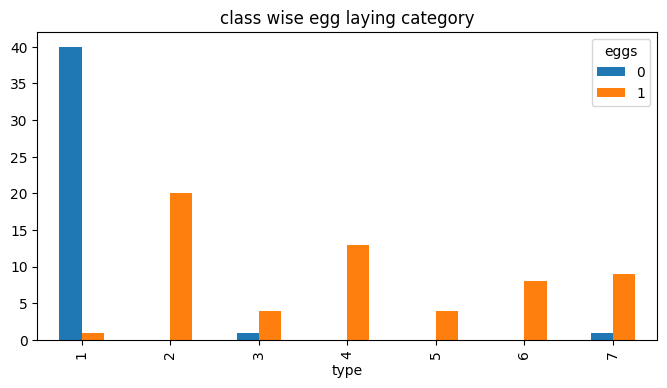

In [146]:
pd.crosstab(zoo['type'],zoo['eggs']).plot(kind='bar',figsize=(8,4),title='class wise egg laying category')
plt.plot()

[]

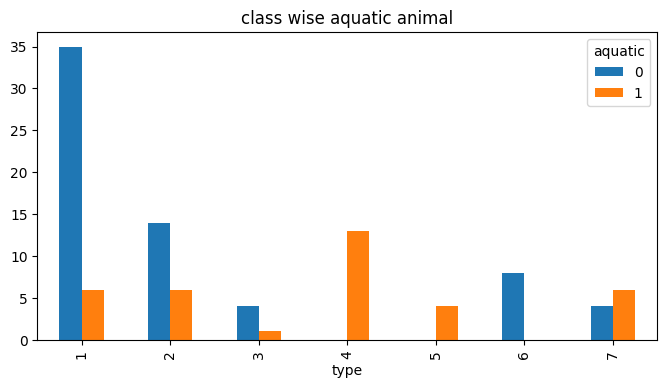

In [147]:
pd.crosstab(zoo['type'],zoo['aquatic']).plot(kind='bar',figsize=(8,4),title='class wise aquatic animal')
plt.plot()

model building

In [148]:
zoo.shape

(101, 18)

In [149]:
x=zoo.iloc[:,1:16]
x.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0


In [150]:
y=zoo.iloc[:,16]
y

0      1
1      1
2      0
3      1
4      1
      ..
96     1
97     0
98     1
99     0
100    0
Name: catsize, Length: 101, dtype: int64

In [151]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,test_size=0.2,random_state=42)


In [152]:
x_train.shape,x_test.shape

((80, 15), (21, 15))

In [153]:
y_train.shape,y_test.shape

((80,), (21,))

In [154]:
knn=KNeighborsClassifier(n_neighbors=3,weights='distance')
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [155]:
knn.score(x_train,y_train)

0.8625

In [156]:
knn.score(x_test,y_test)

0.9047619047619048

In [157]:
scores_train=[]
scores_test=[]
for i in range(1,15):
  knn=KNeighborsClassifier(n_neighbors=i,weights='distance', algorithm='auto', leaf_size=20)
  knn.fit(x_train,y_train)
  scores_train.append(knn.score(x_train,y_train))
  scores_test.append(knn.score(x_test,y_test))

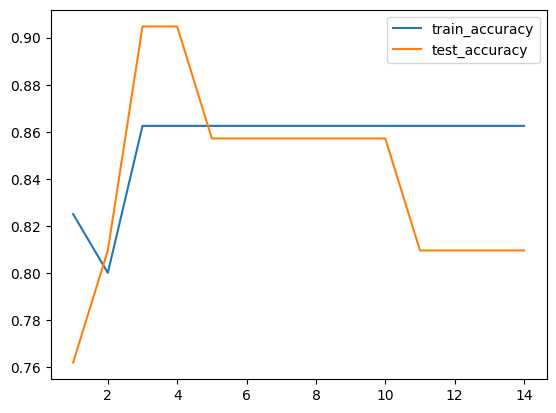

In [158]:
plt.plot(range(1,15),scores_train,label='train_accuracy')
plt.plot(range(1,15),scores_test,label='test_accuracy')
plt.legend()

In [159]:
# lets check at neighbourhood at 5,6,7,10

In [160]:
nigh=[5,6,7,8,9,10]
for i in nigh:
  model_knn=KNeighborsClassifier(n_neighbors=i,weights='distance', algorithm='auto', leaf_size=20)
  model_knn.fit(x_train,y_train)
  print("n_neighbours {}".format(i))
  print("knn train_score =  {}".format(model_knn.score(x_train,y_train)))
  print("knn test__score =  {}".format(model_knn.score(x_test,y_test)))


n_neighbours 5
knn train_score =  0.8625
knn test__score =  0.8571428571428571
n_neighbours 6
knn train_score =  0.8625
knn test__score =  0.8571428571428571
n_neighbours 7
knn train_score =  0.8625
knn test__score =  0.8571428571428571
n_neighbours 8
knn train_score =  0.8625
knn test__score =  0.8571428571428571
n_neighbours 9
knn train_score =  0.8625
knn test__score =  0.8571428571428571
n_neighbours 10
knn train_score =  0.8625
knn test__score =  0.8571428571428571


**-at n_neighbours = 3 model---- is working best**
----------knn train_score =  0.9625
----------knn test__score =  0.9523809523809523

In [161]:
model_knn=KNeighborsClassifier(n_neighbors=i,weights='distance', algorithm='auto', leaf_size=20)
model_knn.fit(x_train,y_train)

KNeighborsClassifier(leaf_size=20, n_neighbors=10, weights='distance')

In [162]:
y_test_pred=model_knn.predict(x_test)

In [163]:
y_test.value_counts()

0    12
1     9
Name: catsize, dtype: int64

In [164]:
pd.crosstab(y_test,y_test_pred)

col_0,0,1
catsize,,
0,10,2
1,1,8


In [165]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_test_pred)

0.8571428571428571

In [166]:
y_train_pred=model_knn.predict(x_train)
accuracy_score(y_train,y_train_pred)

0.8625

GRID SEARCH

n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None

In [167]:
n_neighbors=range(1,20)
weights=['uniform', 'distance']
algorithm=['auto', 'ball_tree', 'kd_tree', 'brute']
leaf_size=[30,35,40,45]
param_grid = dict(n_neighbors=n_neighbors,weights=weights,algorithm=algorithm,leaf_size=leaf_size)
model=KNeighborsClassifier()
grid=GridSearchCV(estimator=model,param_grid=param_grid)


grid.fit(x, y)


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [30, 35, 40, 45],
                         'n_neighbors': range(1, 20),
                         'weights': ['uniform', 'distance']})

In [168]:
print(grid.best_score_)

0.800952380952381


In [169]:
print(grid.best_params_)

{'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 7, 'weights': 'uniform'}


In [170]:
knn=KNeighborsClassifier(n_neighbors=7,weights='uniform', algorithm='auto', leaf_size=30)
knn.fit(x_train,y_train)
print("knn train_score =  {}".format(knn.score(x_train,y_train)))
print("knn test__score =  {}".format(knn.score(x_test,y_test)))

knn train_score =  0.725
knn test__score =  0.8095238095238095


above this is an over fit situation

In [171]:
knn=KNeighborsClassifier(n_neighbors=7,weights='distance', algorithm='auto', leaf_size=30)
knn.fit(x_train,y_train)
print("knn train_score =  {}".format(knn.score(x_train,y_train)))
print("knn test__score =  {}".format(knn.score(x_test,y_test)))

knn train_score =  0.8625
knn test__score =  0.8571428571428571


In [172]:
scores_train=[]
scores_test=[]
for i in range(1,30):
  knn=KNeighborsClassifier(n_neighbors=i,weights='distance', algorithm='auto', leaf_size=30)
  knn.fit(x_train,y_train)
  scores_train.append(knn.score(x_train,y_train))
  scores_test.append(knn.score(x_test,y_test))

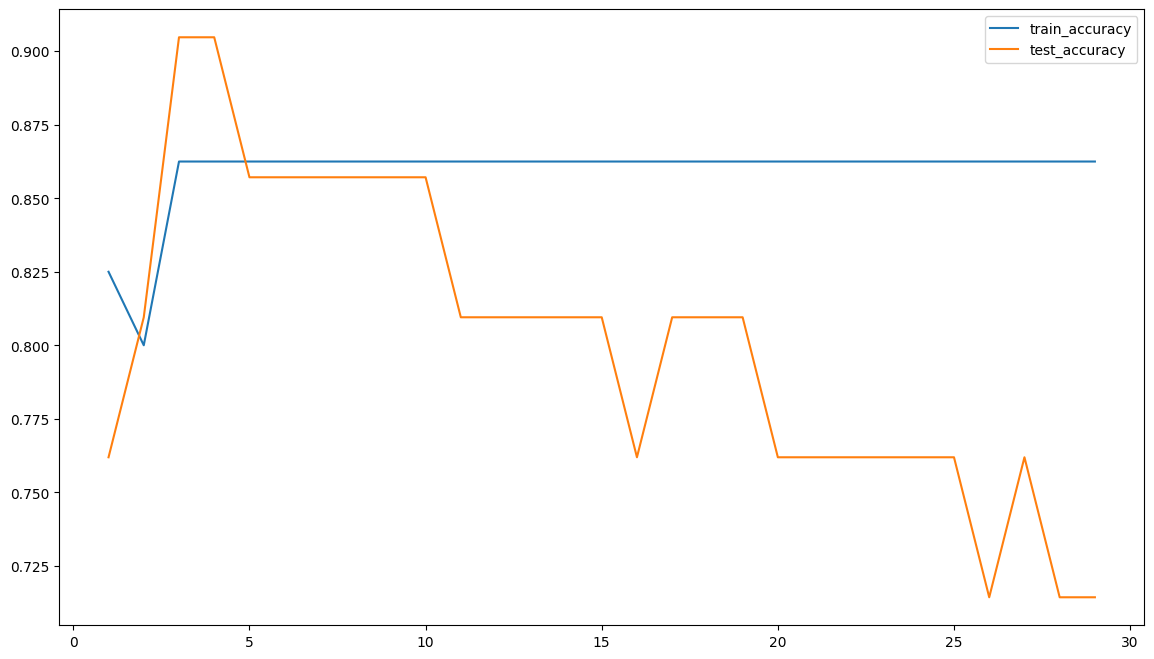

In [173]:
plt.figure(figsize=(14,8))
plt.plot(range(1,30),scores_train,label='train_accuracy')
plt.plot(range(1,30),scores_test,label='test_accuracy')
plt.legend()

 with "n_neighbors=7,weights='distance', algorithm='auto', leaf_size=30" as parameter model able to classify 85.71% accuratly
 *train_score =  0.8625*
  *test__score =  0.8571*